# 数据处理

## 1. 静态数据

### 1.1 根据领域知识删除不重要的特征

In [39]:
import pandas as pd


def convert_and_clean_xlsx(xlsx_file_path, csv_file_path):
    # 读取xlsx文件
    data = pd.read_excel(xlsx_file_path)

    # 要保留的列
    columns_to_keep = [
        "Patient Number",
        "BMI (kg/m2)",
        "Duration of Diabetes (years)",
        "Fasting Plasma Glucose (mg/dl)",
        "2-hour Postprandial Plasma Glucose (mg/dl)",
        "Fasting Insulin (pmol/L)",
        "2-hour Postprandial Insulin (pmol/L)",
        "HbA1c (mmol/mol)",
        "Glycated Albumin (%)",
        "Hypoglycemic Agents",
    ]

    # 只保留指定列
    data_cleaned = data[columns_to_keep]

    # 将清洗后的数据保存为CSV文件
    data_cleaned.to_csv(csv_file_path, index=False, encoding="utf-8-sig")


# 转换并清洗文件
convert_and_clean_xlsx(
    "data_raw/Shanghai_T1DM_Summary.xlsx", "data/Shanghai_T1DM_Summary.csv"
)
convert_and_clean_xlsx(
    "data_raw/Shanghai_T2DM_Summary.xlsx", "data/Shanghai_T2DM_Summary.csv"
)

### 1.2 数据预处理

In [40]:
# 读取CSV文件
dataT1DM = pd.read_csv("data/Shanghai_T1DM_Summary.csv")
dataT2DM = pd.read_csv("data/Shanghai_T2DM_Summary.csv")

# 查看每列的数据类型
print("\nT1DM 数据类型:\n", dataT1DM.dtypes)
print("\nT2DM 数据类型:\n", dataT2DM.dtypes)


T1DM 数据类型:
 Patient Number                                 object
BMI (kg/m2)                                   float64
Duration of Diabetes (years)                  float64
Fasting Plasma Glucose (mg/dl)                float64
2-hour Postprandial Plasma Glucose (mg/dl)     object
Fasting Insulin (pmol/L)                       object
2-hour Postprandial Insulin (pmol/L)           object
HbA1c (mmol/mol)                               object
Glycated Albumin (%)                           object
Hypoglycemic Agents                            object
dtype: object

T2DM 数据类型:
 Patient Number                                 object
BMI (kg/m2)                                   float64
Duration of Diabetes (years)                  float64
Fasting Plasma Glucose (mg/dl)                 object
2-hour Postprandial Plasma Glucose (mg/dl)     object
Fasting Insulin (pmol/L)                       object
2-hour Postprandial Insulin (pmol/L)           object
HbA1c (mmol/mol)                          

In [41]:
import pandas as pd
import numpy as np

# 读取CSV文件
dataT1DM = pd.read_csv("data/Shanghai_T1DM_Summary.csv")
dataT2DM = pd.read_csv("data/Shanghai_T2DM_Summary.csv")

# 将 'Duration of Diabetes (years)' 列向下取整并转换为整数类型
dataT1DM["Duration of Diabetes (years)"] = np.floor(
    dataT1DM["Duration of Diabetes (years)"]
).astype(int)
dataT2DM["Duration of Diabetes (years)"] = np.floor(
    dataT2DM["Duration of Diabetes (years)"]
).astype(int)

# 定义需要处理的列
columns_to_process = [
    "Fasting Plasma Glucose (mg/dl)",
    "2-hour Postprandial Plasma Glucose (mg/dl)",
    "Fasting Insulin (pmol/L)",
    "2-hour Postprandial Insulin (pmol/L)",
    "HbA1c (mmol/mol)",
    "Glycated Albumin (%)",
]

# 替换特殊字符 '/' 为 NaN 并转换为浮点数类型，然后用中位数填充缺失值
for column in columns_to_process:
    dataT1DM[column] = dataT1DM[column].replace("/", np.nan).astype(float)
    dataT2DM[column] = dataT2DM[column].replace("/", np.nan).astype(float)
    dataT1DM[column] = dataT1DM[column].fillna(dataT1DM[column].median())
    dataT2DM[column] = dataT2DM[column].fillna(dataT2DM[column].median())

# 查看修改后的数据类型
print("\nT1DM 数据类型:\n", dataT1DM.dtypes)
print("\nT2DM 数据类型:\n", dataT2DM.dtypes)

# 将清洗后的数据保存回原文件
dataT1DM.to_csv("data/Shanghai_T1DM_Summary.csv", index=False, encoding="utf-8")
dataT2DM.to_csv("data/Shanghai_T2DM_Summary.csv", index=False, encoding="utf-8")

# 合并T1DM和T2DM数据集
combined_data = pd.concat([dataT1DM, dataT2DM], ignore_index=True)

# 去除 'Hypoglycemic Agents' 列中药物名称的多余空格
combined_data["Hypoglycemic Agents"] = (
    combined_data["Hypoglycemic Agents"]
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# 对 'Hypoglycemic Agents' 列进行独热编码
drug_dummies = combined_data["Hypoglycemic Agents"].str.get_dummies(sep=", ")

# 删除包含'None'或空值的列
if "none" in drug_dummies.columns:
    drug_dummies.drop(columns=["none"], inplace=True)

# 添加 'Patient Number' 列
drug_dummies.insert(0, "Patient Number", combined_data["Patient Number"])

# 将独热编码表单独保存为新的CSV文件
drug_dummies.to_csv("data/hypoglycemic_agents.csv", index=False, encoding="utf-8")


T1DM 数据类型:
 Patient Number                                 object
BMI (kg/m2)                                   float64
Duration of Diabetes (years)                    int32
Fasting Plasma Glucose (mg/dl)                float64
2-hour Postprandial Plasma Glucose (mg/dl)    float64
Fasting Insulin (pmol/L)                      float64
2-hour Postprandial Insulin (pmol/L)          float64
HbA1c (mmol/mol)                              float64
Glycated Albumin (%)                          float64
Hypoglycemic Agents                            object
dtype: object

T2DM 数据类型:
 Patient Number                                 object
BMI (kg/m2)                                   float64
Duration of Diabetes (years)                    int32
Fasting Plasma Glucose (mg/dl)                float64
2-hour Postprandial Plasma Glucose (mg/dl)    float64
Fasting Insulin (pmol/L)                      float64
2-hour Postprandial Insulin (pmol/L)          float64
HbA1c (mmol/mol)                          

In [78]:
# 读取CSV文件
dataT1DM = pd.read_csv("data/Shanghai_T1DM_Summary.csv")
dataT2DM = pd.read_csv("data/Shanghai_T2DM_Summary.csv")


# 合并T1DM和T2DM数据集
combined_data = pd.concat([dataT1DM, dataT2DM], ignore_index=True)

# 去除 'Hypoglycemic Agents' 列中药物名称的多余空格
combined_data["Hypoglycemic Agents"] = (
    combined_data["Hypoglycemic Agents"]
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# 对 'Hypoglycemic Agents' 列进行独热编码
drug_dummies = combined_data["Hypoglycemic Agents"].str.get_dummies(sep=", ")

# 删除包含'None'或空值的列
if "none" in drug_dummies.columns:
    drug_dummies.drop(columns=["none"], inplace=True)

# 添加 'Patient Number' 列
drug_dummies.insert(0, "Patient Number", combined_data["Patient Number"])

# 将独热编码表单独保存为新的CSV文件
drug_dummies.to_csv("data/hypoglycemic_agents.csv", index=False, encoding="utf-8")

### 1.3 相关性分析

In [68]:
import os
import pandas as pd


def calculate_statistics(folder_path, output_file):
    # 确保文件夹存在
    assert os.path.exists(folder_path), f"Folder {folder_path} does not exist."

    # 获取文件列表
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

    # 存储统计特征的列表
    stats_list = []

    # 处理每个CSV文件
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        try:
            df = pd.read_csv(file_path)

            if "CGM (mg / dl)" in df.columns:
                # 计算统计特征
                patient_id = os.path.splitext(file_name)[0]
                mean_value = df["CGM (mg / dl)"].mean()
                median_value = df["CGM (mg / dl)"].median()
                std_value = df["CGM (mg / dl)"].std()
                min_value = df["CGM (mg / dl)"].min()
                max_value = df["CGM (mg / dl)"].max()

                # 将统计特征添加到列表中
                stats_list.append(
                    {
                        "Patient ID": patient_id,
                        "Mean": mean_value,
                        "Median": median_value,
                        "Std": std_value,
                        "Min": min_value,
                        "Max": max_value,
                    }
                )
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    # 创建DataFrame并保存为CSV文件
    stats_df = pd.DataFrame(stats_list)
    stats_df.to_csv(output_file, index=False)
    print(f"Statistics saved to {output_file}")


# 使用文件夹路径和输出文件名调用函数
calculate_statistics("data/Shanghai_T1DM", "data/T1DM_statistics.csv")
calculate_statistics("data/Shanghai_T2DM", "data/T2DM_statistics.csv")

Statistics saved to T1DM_statistics.csv
Statistics saved to T2DM_statistics.csv


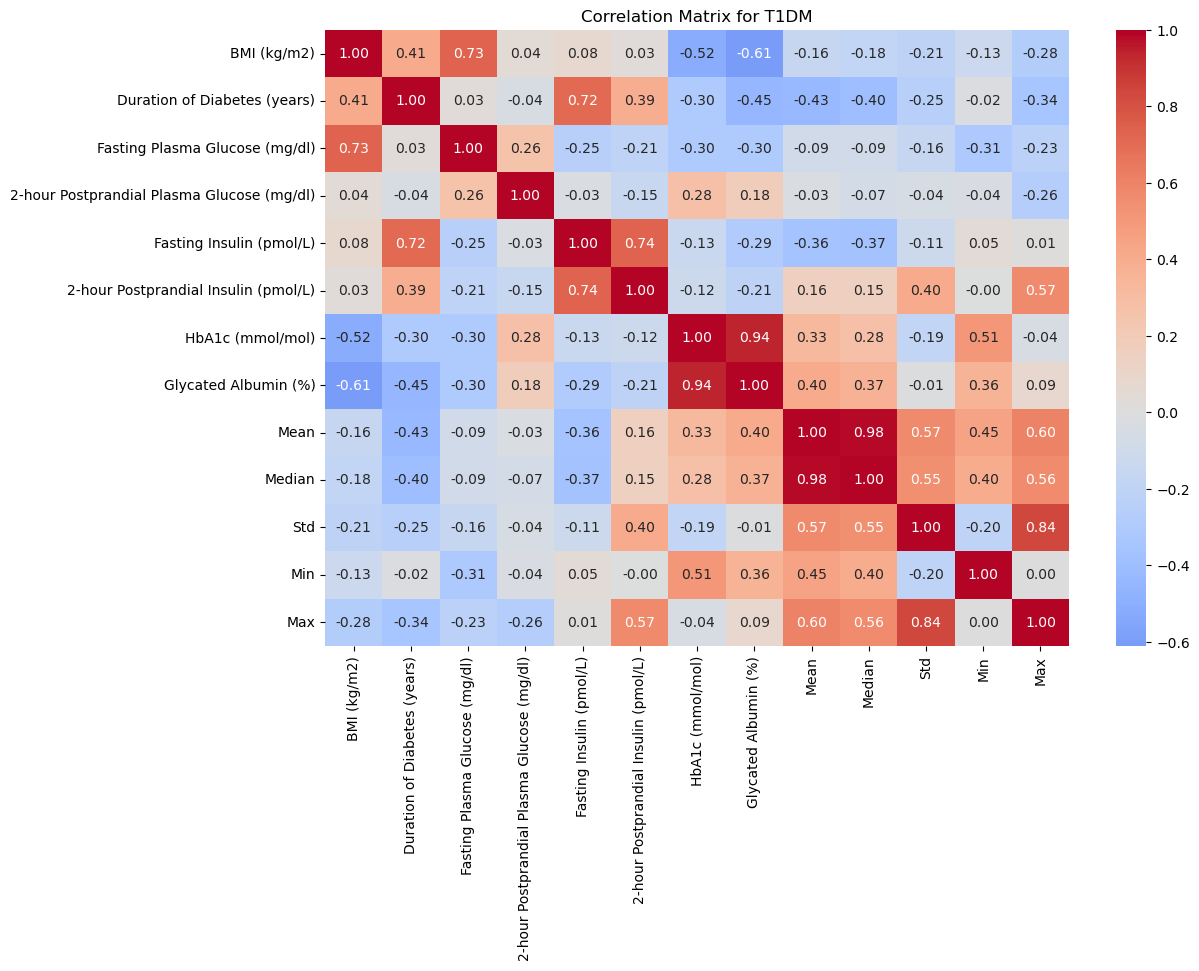

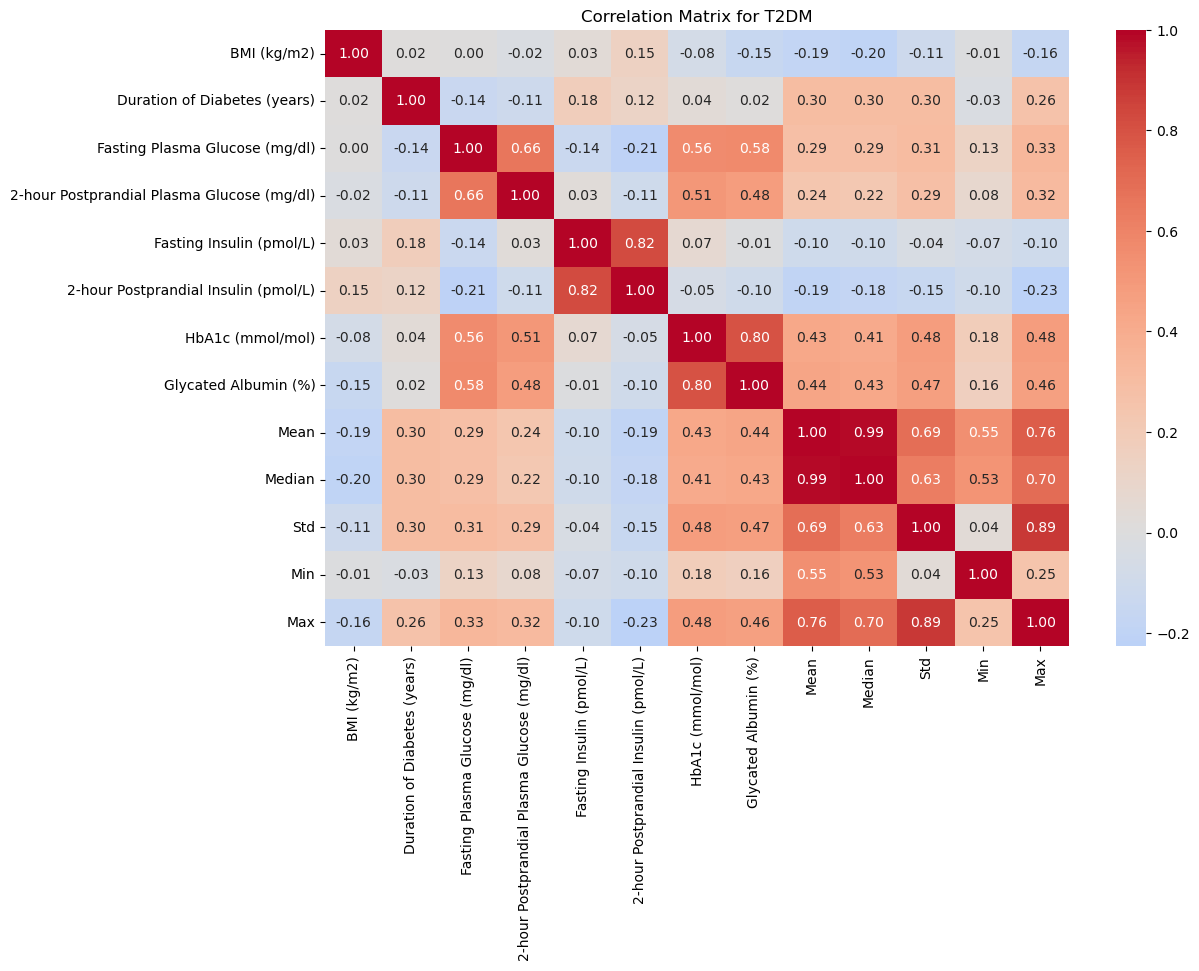

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def Relevance_analysis(path1, path2):

    # 读取CSV文件
    static_data = pd.read_csv(path1)
    dynamic_stats = pd.read_csv(path2)

    # 将两个数据集合并在一起
    combined_df = pd.merge(
        static_data, dynamic_stats, left_on="Patient Number", right_on="Patient ID"
    )

    # 删除不必要的列
    combined_df = combined_df.drop(
        columns=["Patient Number", "Patient ID", "Hypoglycemic Agents"]
    )

    # 计算相关性矩阵
    correlation_matrix = combined_df.corr()

    if path1 == "data/Shanghai_T1DM_Summary.csv":
        correlation_matrix.to_csv("data/correlation_matrix_T1DM.csv", index=True)
        heatmap_title = "Correlation Matrix for T1DM"
    else:
        correlation_matrix.to_csv("data/correlation_matrix_T2DM.csv", index=True)
        heatmap_title = "Correlation Matrix for T2DM"

    # 绘制相关性矩阵的热图
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title(heatmap_title)
    plt.show()


# 调用函数
Relevance_analysis("data/Shanghai_T1DM_Summary.csv", "data/T1DM_statistics.csv")
Relevance_analysis("data/shanghai_T2DM_Summary.csv", "data/T2DM_statistics.csv")

In [88]:
import pandas as pd


def calculate_static_feature_sums(
    correlation_matrix_path, static_features, dynamic_features
):
    # 读取相关性矩阵的 CSV 文件
    correlation_matrix = pd.read_csv(correlation_matrix_path, index_col=0)

    # 计算每个静态特征与五个动态特征之间的相关性总和
    feature_sums = {}
    for static_feature in static_features:
        correlation_sum = 0
        for dynamic_feature in dynamic_features:
            correlation_sum += abs(
                correlation_matrix.loc[static_feature, dynamic_feature]
            )
        feature_sums[static_feature] = correlation_sum

    # 按相关性总和降序排序
    sorted_feature_sums = dict(
        sorted(feature_sums.items(), key=lambda item: item[1], reverse=True)
    )

    return sorted_feature_sums


# 定义静态特征和动态特征
static_features = [
    "BMI (kg/m2)",
    "Duration of Diabetes (years)",
    "Fasting Plasma Glucose (mg/dl)",
    "2-hour Postprandial Plasma Glucose (mg/dl)",
    "Fasting Insulin (pmol/L)",
    "2-hour Postprandial Insulin (pmol/L)",
    "HbA1c (mmol/mol)",
    "Glycated Albumin (%)",
]
dynamic_features = ["Mean", "Median", "Std", "Min", "Max"]

# 计算并排序静态特征与动态特征的相关性总和
sorted_feature_sums = calculate_static_feature_sums(
    "data/correlation_matrix_T1DM.csv", static_features, dynamic_features
)
sorted_feature_sums

{'Duration of Diabetes (years)': 1.4461835599668196,
 'HbA1c (mmol/mol)': 1.3381624365752587,
 '2-hour Postprandial Insulin (pmol/L)': 1.2870104268929974,
 'Glycated Albumin (%)': 1.2292193902414628,
 'BMI (kg/m2)': 0.955430280946018,
 'Fasting Insulin (pmol/L)': 0.9032887296642582,
 'Fasting Plasma Glucose (mg/dl)': 0.8853858985415652,
 '2-hour Postprandial Plasma Glucose (mg/dl)': 0.445899151433402}

In [89]:
# 计算并排序静态特征与动态特征的相关性总和
sorted_feature_sums = calculate_static_feature_sums(
    "data/correlation_matrix_T2DM.csv", static_features, dynamic_features
)
sorted_feature_sums

{'HbA1c (mmol/mol)': 1.9837058192223456,
 'Glycated Albumin (%)': 1.9526663368754618,
 'Fasting Plasma Glucose (mg/dl)': 1.357040941918417,
 'Duration of Diabetes (years)': 1.1807050119333464,
 '2-hour Postprandial Plasma Glucose (mg/dl)': 1.153357244759583,
 '2-hour Postprandial Insulin (pmol/L)': 0.8380879462291625,
 'BMI (kg/m2)': 0.6677050000051548,
 'Fasting Insulin (pmol/L)': 0.4171549000707161}

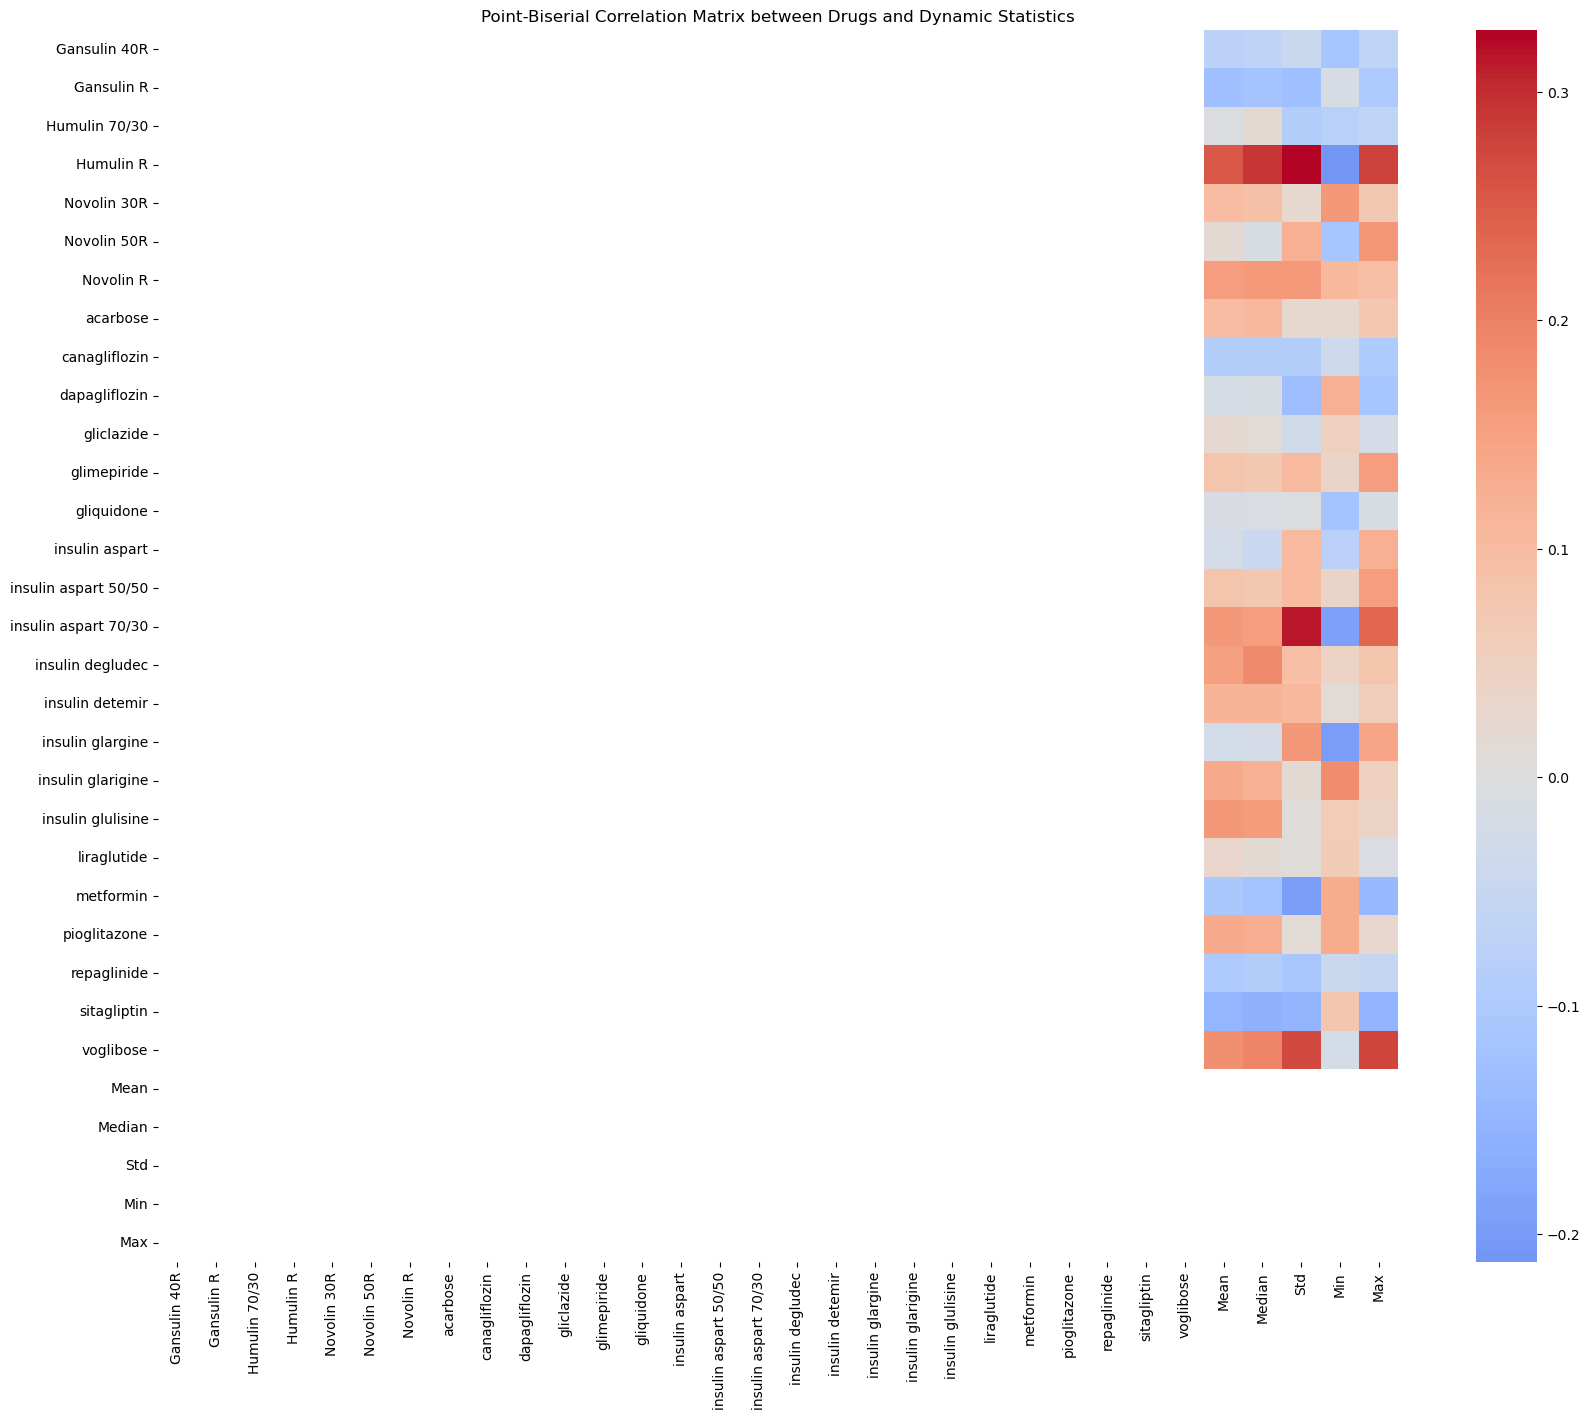

Correlation matrix saved to: data/correlation_matrix_drugs.csv.csv


In [92]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 读取药物独热编码数据和动态统计信息数据
hypoglycemic_agents_path = "data/hypoglycemic_agents.csv"
t1dm_stats_path = "data/T1DM_statistics.csv"
t2dm_stats_path = "data/T2DM_statistics.csv"

hypoglycemic_agents = pd.read_csv(hypoglycemic_agents_path)
t1dm_stats = pd.read_csv(t1dm_stats_path)
t2dm_stats = pd.read_csv(t2dm_stats_path)

# 合并T1DM和T2DM的动态统计信息
dynamic_stats = pd.concat([t1dm_stats, t2dm_stats], ignore_index=True)

# 合并数据集
combined_df = pd.merge(
    hypoglycemic_agents, dynamic_stats, left_on="Patient Number", right_on="Patient ID"
)

# 删除 'Patient Number' 和 'Patient ID' 列
combined_df = combined_df.drop(columns=["Patient Number", "Patient ID"])

# 计算点双列相关系数矩阵
correlation_matrix = pd.DataFrame(
    index=combined_df.columns, columns=combined_df.columns
)

for col1 in hypoglycemic_agents.columns[1:]:
    for col2 in dynamic_stats.columns[1:]:
        correlation_matrix.loc[col1, col2] = stats.pointbiserialr(
            combined_df[col1], combined_df[col2]
        )[0]

# 保存相关性矩阵
correlation_matrix_path = "data/correlation_matrix_drugs.csv.csv"
correlation_matrix.to_csv(correlation_matrix_path, index=True)

# 绘制相关性矩阵的热图
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix.astype(float), annot=False, cmap="coolwarm", center=0)
plt.title("Point-Biserial Correlation Matrix between Drugs and Dynamic Statistics")
plt.show()

# 打印相关性矩阵保存路径
print(f"Correlation matrix saved to: {correlation_matrix_path}")

In [95]:
# 读取相关性矩阵
correlation_matrix = pd.read_csv(correlation_matrix_path, index_col=0)

# 获取药物独热编码项的列名
hypoglycemic_agents_columns = hypoglycemic_agents.columns[1:]

# 定义动态统计特征
dynamic_features = ["Mean", "Median", "Std", "Min", "Max"]

# 计算每个独热编码项对五个统计特征的相关性总和
feature_sums = {}
for col in hypoglycemic_agents_columns:
    correlation_sum = 0
    for dynamic_feature in dynamic_features:
        correlation_sum += abs(correlation_matrix.loc[col, dynamic_feature])
    feature_sums[col] = correlation_sum

# 按相关性总和降序排序
sorted_feature_sums = dict(
    sorted(feature_sums.items(), key=lambda item: item[1], reverse=True)
)
sorted_feature_sums

{'Humulin R': 1.365444158221848,
 'insulin aspart 70/30': 1.06324690222164,
 'voglibose': 0.946377183963179,
 'metformin': 0.6986628850317034,
 'Novolin R': 0.6854082306114344,
 'sitagliptin': 0.6852370154880306,
 'insulin degludec': 0.5551849984711914,
 'insulin glargine': 0.5544288133650825,
 'insulin glarigine': 0.5064889597678641,
 'Gansulin R': 0.4889905571280143,
 'glimepiride': 0.45700893221455063,
 'insulin aspart 50/50': 0.45700893221455063,
 'Novolin 30R': 0.44981075394747994,
 'Novolin 50R': 0.43604410870946597,
 'pioglitazone': 0.43580275030128934,
 'insulin glulisine': 0.4347913458122733,
 'insulin detemir': 0.41448751289298663,
 'dapagliflozin': 0.3989705959581452,
 'canagliflozin': 0.39839570463199087,
 'repaglinide': 0.3973211454109254,
 'insulin aspart': 0.37804370240755825,
 'Gansulin 40R': 0.36299685165116846,
 'acarbose': 0.3312078141826219,
 'Humulin 70/30': 0.2605611291192308,
 'gliquidone': 0.15197177803775078,
 'gliclazide': 0.1351941319739795,
 'liraglutide': 0

## 2. 动态数据

### 2.1 观察数据

In [25]:
import os
import pandas as pd

# 指定文件夹路径
folder_path = "data_raw/Shanghai_T2DM"

# 指定要检查的列
columns_to_check = [
    "Blood Ketone (mmol / L)",
    "Insulin dose - s.c.",
    "Non-insulin hypoglycemic agents",
    "CSII - bolus insulin (Novolin R, IU)",
    "CSII - basal insulin (Novolin R, IU / H)",
    "Insulin dose - i.v.",
]

# 初始化统计字典
non_empty_counts = {col: 0 for col in columns_to_check}
files_with_data = {col: [] for col in columns_to_check}

# 初始化条件检查的字典
only_bolus_files = []
only_basal_files = []
only_insulin_s_c_files = []

# 遍历文件夹中的所有xlsx和xls文件
for filename in os.listdir(folder_path):
    if filename.endswith(".xlsx") or filename.endswith(".xls"):
        file_path = os.path.join(folder_path, filename)
        try:
            # 读取文件
            df = pd.read_excel(file_path)
            # 统计每列非空的行数，并记录有数据的文件名
            non_empty_counts_in_file = {
                col: df[col].notna().sum()
                for col in columns_to_check
                if col in df.columns
            }
            for col in columns_to_check:
                if (
                    col in non_empty_counts_in_file
                    and non_empty_counts_in_file[col] > 0
                ):
                    non_empty_counts[col] += non_empty_counts_in_file[col]
                    files_with_data[col].append(filename)

            # 检查特定条件
            bolus_non_empty = (
                non_empty_counts_in_file.get("CSII - bolus insulin (Novolin R, IU)", 0)
                > 0
            )
            basal_non_empty = (
                non_empty_counts_in_file.get(
                    "CSII - basal insulin (Novolin R, IU / H)", 0
                )
                > 0
            )
            insulin_s_c_non_empty = (
                non_empty_counts_in_file.get("Insulin dose - s.c.", 0) > 0
            )

            if bolus_non_empty and not basal_non_empty and not insulin_s_c_non_empty:
                only_bolus_files.append(filename)
            if basal_non_empty and not bolus_non_empty and not insulin_s_c_non_empty:
                only_basal_files.append(filename)
            if insulin_s_c_non_empty and not bolus_non_empty and not basal_non_empty:
                only_insulin_s_c_files.append(filename)

        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# 打印结果
print("Non-empty row counts for specified columns:")
for col, count in non_empty_counts.items():
    print(f"{col}: {count}")

print("\nFiles with data for each column:")
for col, files in files_with_data.items():
    print(f"{col}: {files}")

# 打印特定条件下的文件列表
print("\nFiles with only 'CSII - bolus insulin (Novolin R, IU)' not empty:")
print(only_bolus_files)

print("\nFiles with only 'CSII - basal insulin (Novolin R, IU / H)' not empty:")
print(only_basal_files)

print("\nFiles with only 'Insulin dose - s.c.' not empty:")
print(only_insulin_s_c_files)

Non-empty row counts for specified columns:
Blood Ketone (mmol / L): 18
Insulin dose - s.c.: 828
Non-insulin hypoglycemic agents: 2171
CSII - bolus insulin (Novolin R, IU): 555
CSII - basal insulin (Novolin R, IU / H): 1089
Insulin dose - i.v.: 9

Files with data for each column:
Blood Ketone (mmol / L): ['2002_0_20210513.xlsx', '2009_0_20211103.xlsx', '2010_0_20220111.xlsx', '2019_0_20210513.xls', '2021_0_20211013.xls', '2025_0_20210506.xls', '2027_0_20210521.xls', '2042_0_20211019.xls']
Insulin dose - s.c.: ['2000_0_20201230.xlsx', '2001_0_20201102.xlsx', '2001_1_20201117.xlsx', '2003_0_20210615.xlsx', '2005_0_20211201.xlsx', '2007_0_20220108.xlsx', '2008_0_20220118.xlsx', '2009_0_20211103.xlsx', '2010_0_20220111.xlsx', '2013_0_20220123.xlsx', '2014_0_20201224.xlsx', '2014_1_20210317.xlsx', '2015_0_20210203.xlsx', '2015_1_20210219.xlsx', '2017_0_20210102.xlsx', '2017_1_20201118.xls', '2018_0_20210420.xls', '2019_0_20210513.xls', '2020_0_20210423.xls', '2021_0_20211013.xls', '2022_0_2

### 2.2 根据领域知识删除不重要的特征

In [58]:
import os
import pandas as pd
import glob


def convert_and_clean_xlsx(folder_path, output_folder_path):
    # 搜索文件夗中所有的xlsx和xls文件
    files = glob.glob(os.path.join(folder_path, "*.xls*"))

    for file in files:
        print(f"Processing file: {file}")
        # 读取文件
        data = pd.read_excel(file)

        # 要保留的列
        required_columns = [
            "Date",
            "CGM (mg / dl)",
            "Dietary intake",
            "Insulin dose - s.c.",
            "CSII - bolus insulin (Novolin R, IU)",
            "CSII - basal insulin (Novolin R, IU / H)",
        ]

        # 检查并保留存在的列
        existing_columns = [col for col in required_columns if col in data.columns]

        # 如果没有找到所有要求的列
        if len(existing_columns) != len(required_columns):
            raise ValueError(f"Missing required columns in {file}")

        # 只保留指定列
        data_cleaned = data[existing_columns]

        # 定义输出文件路径，移除原始的扩展名，添加.csv
        base_filename = os.path.splitext(os.path.basename(file))[0]
        output_file_path = os.path.join(output_folder_path, f"{base_filename}.csv")

        # 将清洗后的数据保存为CSV文件
        data_cleaned.to_csv(output_file_path, index=False, encoding="utf-8")
        print(f"Output saved to: {output_file_path}")


# 调用函数
convert_and_clean_xlsx("data_raw/Shanghai_T1DM", "data/Shanghai_T1DM")
convert_and_clean_xlsx("data_raw/Shanghai_T2DM", "data/Shanghai_T2DM")

Processing file: data_raw/Shanghai_T1DM\1001_0_20210730.xlsx
Output saved to: data/Shanghai_T1DM\1001_0_20210730.csv
Processing file: data_raw/Shanghai_T1DM\1002_0_20210504.xls
Output saved to: data/Shanghai_T1DM\1002_0_20210504.csv
Processing file: data_raw/Shanghai_T1DM\1002_1_20210521.xls
Output saved to: data/Shanghai_T1DM\1002_1_20210521.csv
Processing file: data_raw/Shanghai_T1DM\1002_2_20210909.xls
Output saved to: data/Shanghai_T1DM\1002_2_20210909.csv
Processing file: data_raw/Shanghai_T1DM\1003_0_20210831.xls
Output saved to: data/Shanghai_T1DM\1003_0_20210831.csv
Processing file: data_raw/Shanghai_T1DM\1004_0_20210425.xls
Output saved to: data/Shanghai_T1DM\1004_0_20210425.csv
Processing file: data_raw/Shanghai_T1DM\1005_0_20210522.xls
Output saved to: data/Shanghai_T1DM\1005_0_20210522.csv
Processing file: data_raw/Shanghai_T1DM\1006_0_20210114.xlsx
Output saved to: data/Shanghai_T1DM\1006_0_20210114.csv
Processing file: data_raw/Shanghai_T1DM\1006_1_20210209.xlsx
Output sa

### 2.3 数据预处理

In [59]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("data/Shanghai_T2DM/2000_0_20201230.csv")

# 查看每列的数据类型
print("\nT1DM 数据类型:\n", data.dtypes)


T1DM 数据类型:
 Date                                         object
CGM (mg / dl)                               float64
Dietary intake                               object
Insulin dose - s.c.                          object
CSII - bolus insulin (Novolin R, IU)        float64
CSII - basal insulin (Novolin R, IU / H)    float64
dtype: object


In [60]:
import os
import pandas as pd

# 定义文件夹路径
folder_path = "data/Shanghai_T2DM"  # 替换为包含CSV文件的文件夹路径

def process_date_column(folder_path):

    # 确保文件夹存在
    assert os.path.exists(folder_path), f"Folder {folder_path} does not exist."

    # 获取文件列表
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

    # 处理每个CSV文件
    for file_name in csv_files:
        # 读取CSV文件
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)

        # 将 'Date' 列转换为 datetime 类型
        if "Date" in data.columns:
            data["Date"] = pd.to_datetime(data["Date"])

        # 保存修改后的CSV文件
        output_file_path = os.path.join(folder_path, file_name)
        data.to_csv(output_file_path, index=False, encoding="utf-8")

process_date_column("data/Shanghai_T1DM")
process_date_column("data/Shanghai_T2DM")
print("All files have been processed successfully.")

All files have been processed successfully.


In [61]:
import os
import pandas as pd
import re

def process_insulin_dose_column(folder_path):

    # 确保文件夹存在
    assert os.path.exists(folder_path), f"Folder {folder_path} does not exist."

    # 获取文件列表
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

    # 处理每个CSV文件
    for file_name in csv_files:
        # 读取CSV文件
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # 检查列是否存在
        if "Insulin dose - s.c." in df.columns:
            # 提取数值部分并转换为整数类型
            def extract_int(value):
                match = re.search(r"(\d+)\s*IU", str(value))
                return int(match.group(1)) if match else None

            df["Insulin dose - s.c."] = df["Insulin dose - s.c."].apply(extract_int)

            # 将空值替换为0
            df["Insulin dose - s.c."] = df["Insulin dose - s.c."].fillna(0)

            # 显式地转换为整数类型
            df["Insulin dose - s.c."] = df["Insulin dose - s.c."].astype(int)

        # 保存修改后的CSV文件
        df.to_csv(file_path, index=False)

process_insulin_dose_column("data/Shanghai_T1DM")
process_insulin_dose_column("data/Shanghai_T2DM")
print("All files have been processed successfully.")

C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1599079146.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Insulin dose - s.c."] = df["Insulin dose - s.c."].fillna(0)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1599079146.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Insulin dose - s.c."] = df["Insulin dose - s.c."].fillna(0)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1599079146.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Ca

All files have been processed successfully.


C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1599079146.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Insulin dose - s.c."] = df["Insulin dose - s.c."].fillna(0)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1599079146.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Insulin dose - s.c."] = df["Insulin dose - s.c."].fillna(0)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1599079146.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Ca

In [62]:
import os
import pandas as pd


def process_CSII(folder_path):

    # 确保文件夹存在
    assert os.path.exists(folder_path), f"Folder {folder_path} does not exist."

    # 获取文件列表
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

    # 处理每个CSV文件
    for file_name in csv_files:
        # 读取CSV文件
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # 处理浮点类型列
        float_columns = [
            "CSII - bolus insulin (Novolin R, IU)",
            "CSII - basal insulin (Novolin R, IU / H)",
        ]

        try:
            for col in float_columns:
                if col in df.columns:
                    # 将“temporarily suspend insulin delivery”替换为0
                    df[col] = df[col].replace("temporarily suspend insulin delivery", 0)
                    # 检测并处理“acarbose 50 mg”
                    acarbose_mask = df[col] == "acarbose 50 mg"
                    df.loc[acarbose_mask, col] = 0
                    if "Insulin dose - s.c." in df.columns:
                        df.loc[acarbose_mask, "Insulin dose - s.c."] = 1
                    # 先将列转换为数值类型
                    df[col] = pd.to_numeric(df[col])
                    if col == "CSII - basal insulin (Novolin R, IU / H)":
                        # 对 "CSII - basal insulin (Novolin R, IU / H)" 列，使用前向填充法填充缺失值
                        df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
                    else:
                        # 对其他列，直接填充0并转换为浮点数
                        df[col] = df[col].fillna(0).astype(float)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

        # 保存修改后的CSV文件
        df.to_csv(file_path, index=False)


process_CSII("data/Shanghai_T1DM")
process_CSII("data/Shanghai_T2DM")
print("All files have been processed successfully.")

C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.

All files have been processed successfully.


C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method="ffill").fillna(0).astype(float)
C:\Users\Momoyama\AppData\Local\Temp\ipykernel_12828\1400953582.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.

In [63]:
import os
import pandas as pd

def process_intake(folder1, folder2):

    # 确保文件夹存在
    assert os.path.exists(folder1), f"Folder {folder1} does not exist."
    assert os.path.exists(folder2), f"Folder {folder2} does not exist."

    # 获取文件列表，并确保只获取.csv和.xlsx文件
    files1 = sorted([f for f in os.listdir(folder1) if f.endswith('.csv')])
    files2 = sorted([f for f in os.listdir(folder2) if f.endswith('.xlsx')])

    # 确保文件数量相同
    assert len(files1) == len(files2), "The number of files in both folders should be the same."

    # 确保文件名一一对应（不包括后缀）
    excel_file_bases = [os.path.splitext(f)[0] for f in files2]
    csv_file_bases = [os.path.splitext(f)[0] for f in files1]
    for excel_base, csv_base in zip(excel_file_bases, csv_file_bases):
        assert (
            excel_base == csv_base
        ), f"Files do not match: {excel_base} (Excel) and {csv_base} (CSV)"

    # 处理每对文件
    for file_name_csv, file_name_xlsx in zip(files1, files2):
        # 读取文件夹1中的CSV文件
        file1_path = os.path.join(folder1, file_name_csv)
        df1 = pd.read_csv(file1_path)

        # 删除“Dietary intake”列
        if 'Dietary intake' in df1.columns:
            df1 = df1.drop(columns=['Dietary intake'])

        # 读取文件夹2中的Excel文件
        file2_path = os.path.join(folder2, file_name_xlsx)
        df2 = pd.read_excel(file2_path)

        # 提取“Carbohydrate/g”列
        if 'Carbohydrate/g' in df2.columns:
            carbohydrate_col = df2[['Carbohydrate/g']]
            # 合并“Carbohydrate/g”列到文件夹1的CSV文件
            df1 = pd.concat([df1, carbohydrate_col], axis=1)

        # 保存修改后的CSV文件到文件夹1
        df1.to_csv(file1_path, index=False)

process_intake("data/Shanghai_T1DM", "DataProcessing_new/Shanghai_T1DM")
process_intake("data/Shanghai_T2DM", "DataProcessing_new/Shanghai_T2DM")


print("All files have been processed successfully.")

All files have been processed successfully.


In [64]:
import os
import pandas as pd


def process_files(excel_folder, csv_folder):
    # 确保文件夹存在
    assert os.path.exists(excel_folder), f"Folder {excel_folder} does not exist."
    assert os.path.exists(csv_folder), f"Folder {csv_folder} does not exist."

    # 获取文件列表
    excel_files = [
        f for f in os.listdir(excel_folder) if f.endswith(".xlsx") or f.endswith(".xls")
    ]
    csv_files = [f for f in os.listdir(csv_folder) if f.endswith(".csv")]

    # 确保文件数量相同
    assert len(excel_files) == len(
        csv_files
    ), "The number of files in both folders should be the same."

    # 处理每个Excel文件
    for file_name in excel_files:
        excel_file_path = os.path.join(excel_folder, file_name)
        csv_file_path = os.path.join(
            csv_folder, os.path.splitext(file_name)[0] + ".csv"
        )

        if not os.path.exists(csv_file_path):
            print(f"Corresponding CSV file not found for {file_name}")
            continue

        try:
            # 读取Excel文件
            df_excel = pd.read_excel(excel_file_path)

            # 读取对应的CSV文件
            df_csv = pd.read_csv(csv_file_path)

            # 计算“Carbohydrate/g”列的中位数，忽略0
            if "Carbohydrate/g" in df_csv.columns:
                carb_median = df_csv[df_csv["Carbohydrate/g"] != 0][
                    "Carbohydrate/g"
                ].median()

                # 找到“Dietary intake”列中值为"data not available"的行
                if "Dietary intake" in df_excel.columns:
                    for index, row in df_excel.iterrows():
                        if row["Dietary intake"] == "data not available":
                            # 将中位值填入CSV文件的“Carbohydrate/g”对应行
                            df_csv.at[index, "Carbohydrate/g"] = carb_median

            # 保存修改后的CSV文件
            df_csv.to_csv(csv_file_path, index=False)

        except Exception as e:
            print(f"Error processing {file_name}: {e}")


# 调用函数
process_files("data_raw/Shanghai_T1DM", "data/Shanghai_T1DM")
process_files("data_raw/Shanghai_T2DM", "data/Shanghai_T2DM")

In [65]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv("data/Shanghai_T1DM/1012_0_20210923.csv")

# 查看每列的数据类型
print("\nT1DM 数据类型:\n", data.dtypes)


# 读取CSV文件
data = pd.read_csv("data/Shanghai_T2DM/2000_0_20201230.csv")

# 查看每列的数据类型
print("\nT2DM 数据类型:\n", data.dtypes)


T1DM 数据类型:
 Date                                         object
CGM (mg / dl)                               float64
Insulin dose - s.c.                           int64
CSII - bolus insulin (Novolin R, IU)        float64
CSII - basal insulin (Novolin R, IU / H)    float64
Carbohydrate/g                              float64
dtype: object

T2DM 数据类型:
 Date                                         object
CGM (mg / dl)                               float64
Insulin dose - s.c.                           int64
CSII - bolus insulin (Novolin R, IU)        float64
CSII - basal insulin (Novolin R, IU / H)    float64
Carbohydrate/g                              float64
dtype: object


### 2.4 特征选择

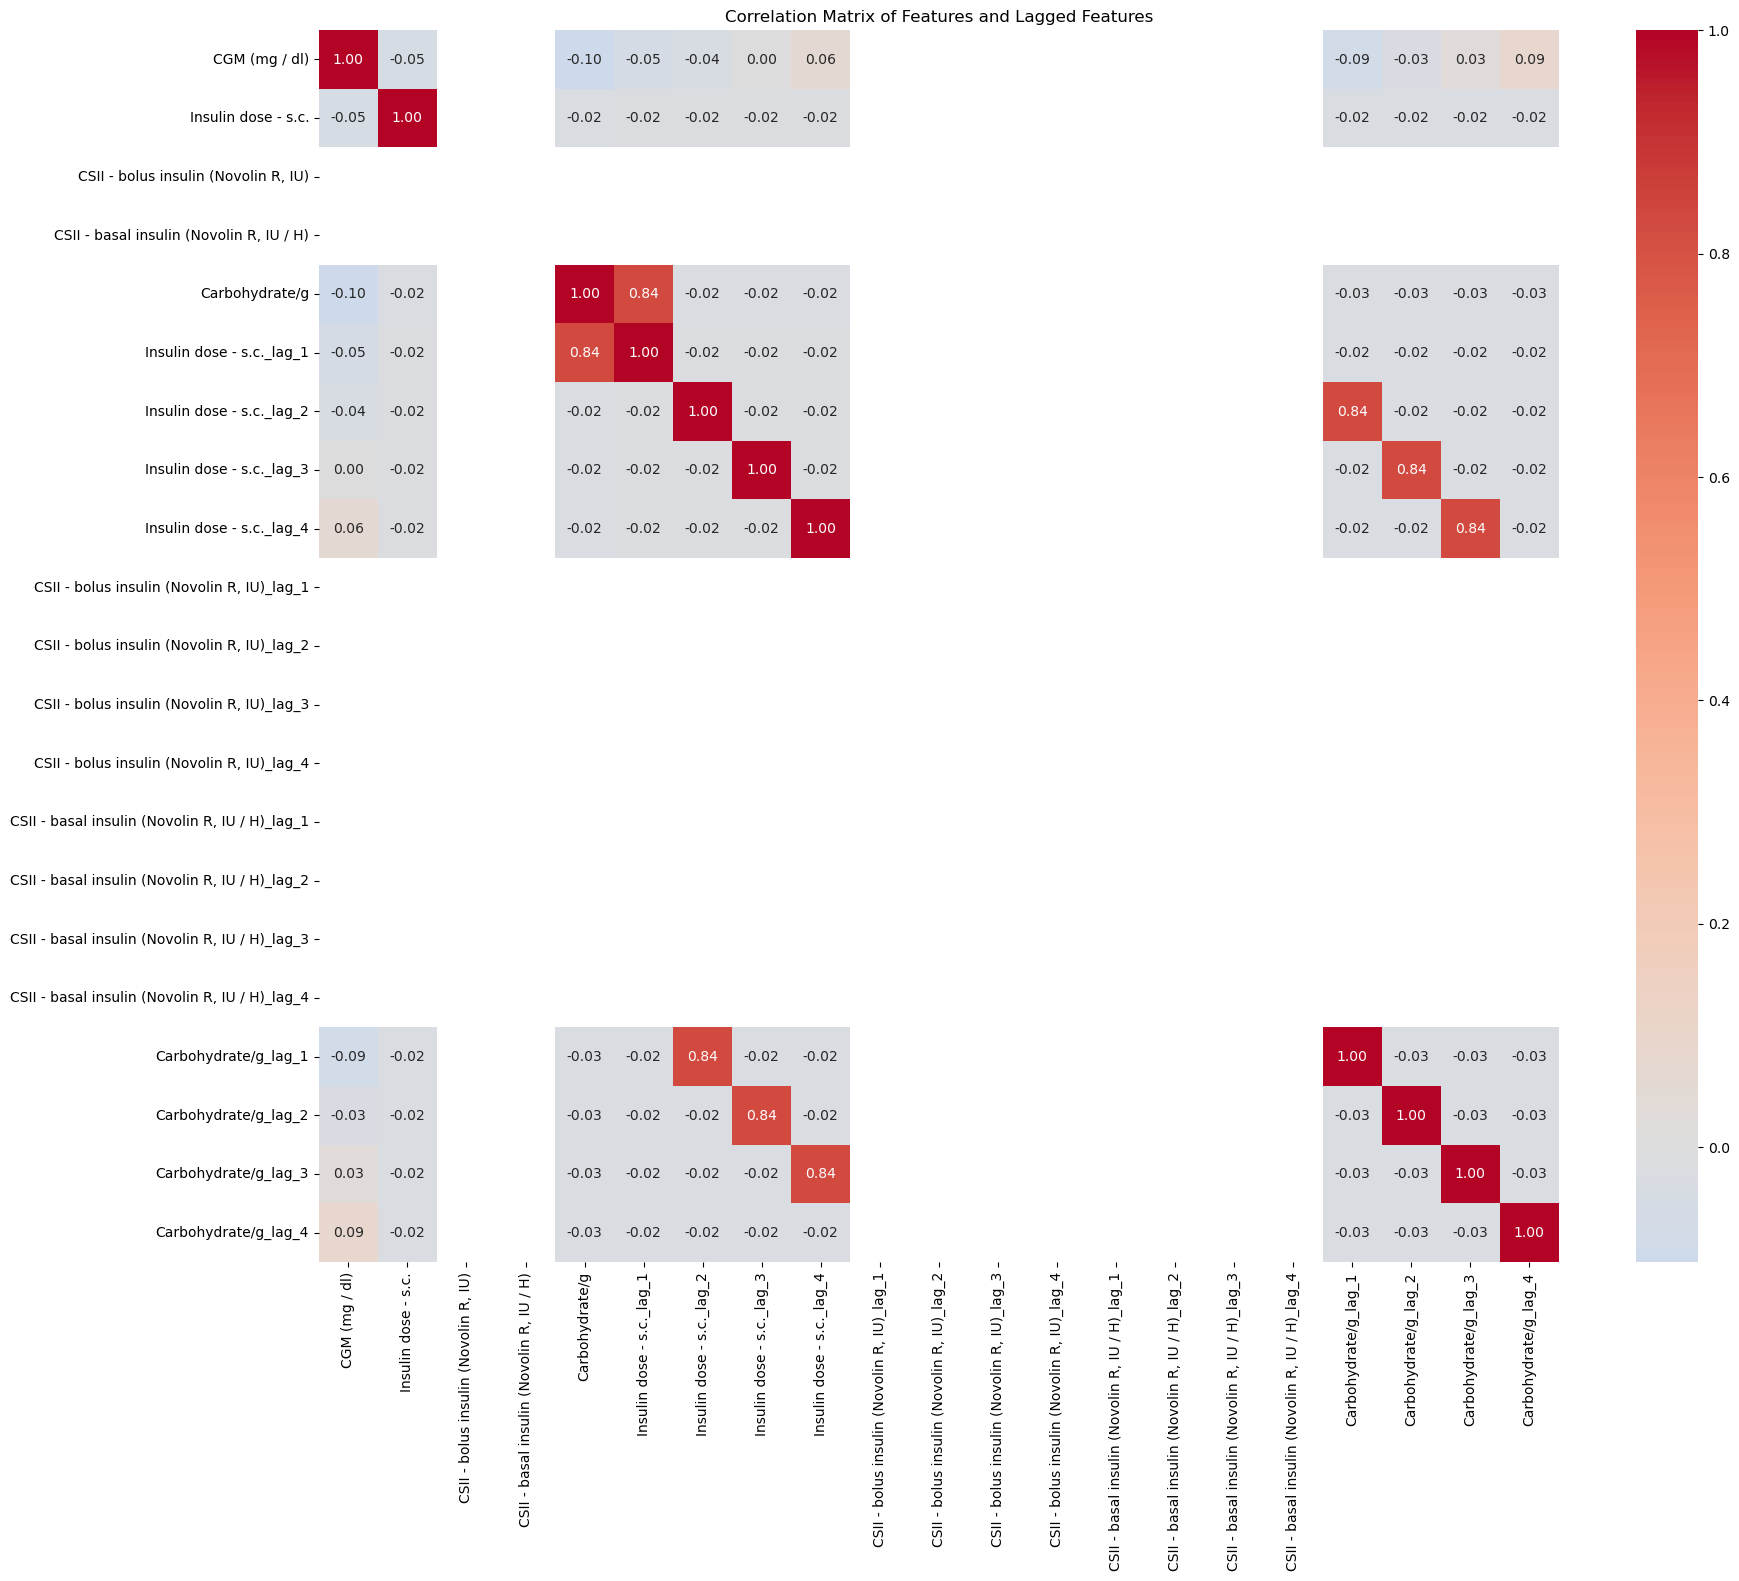

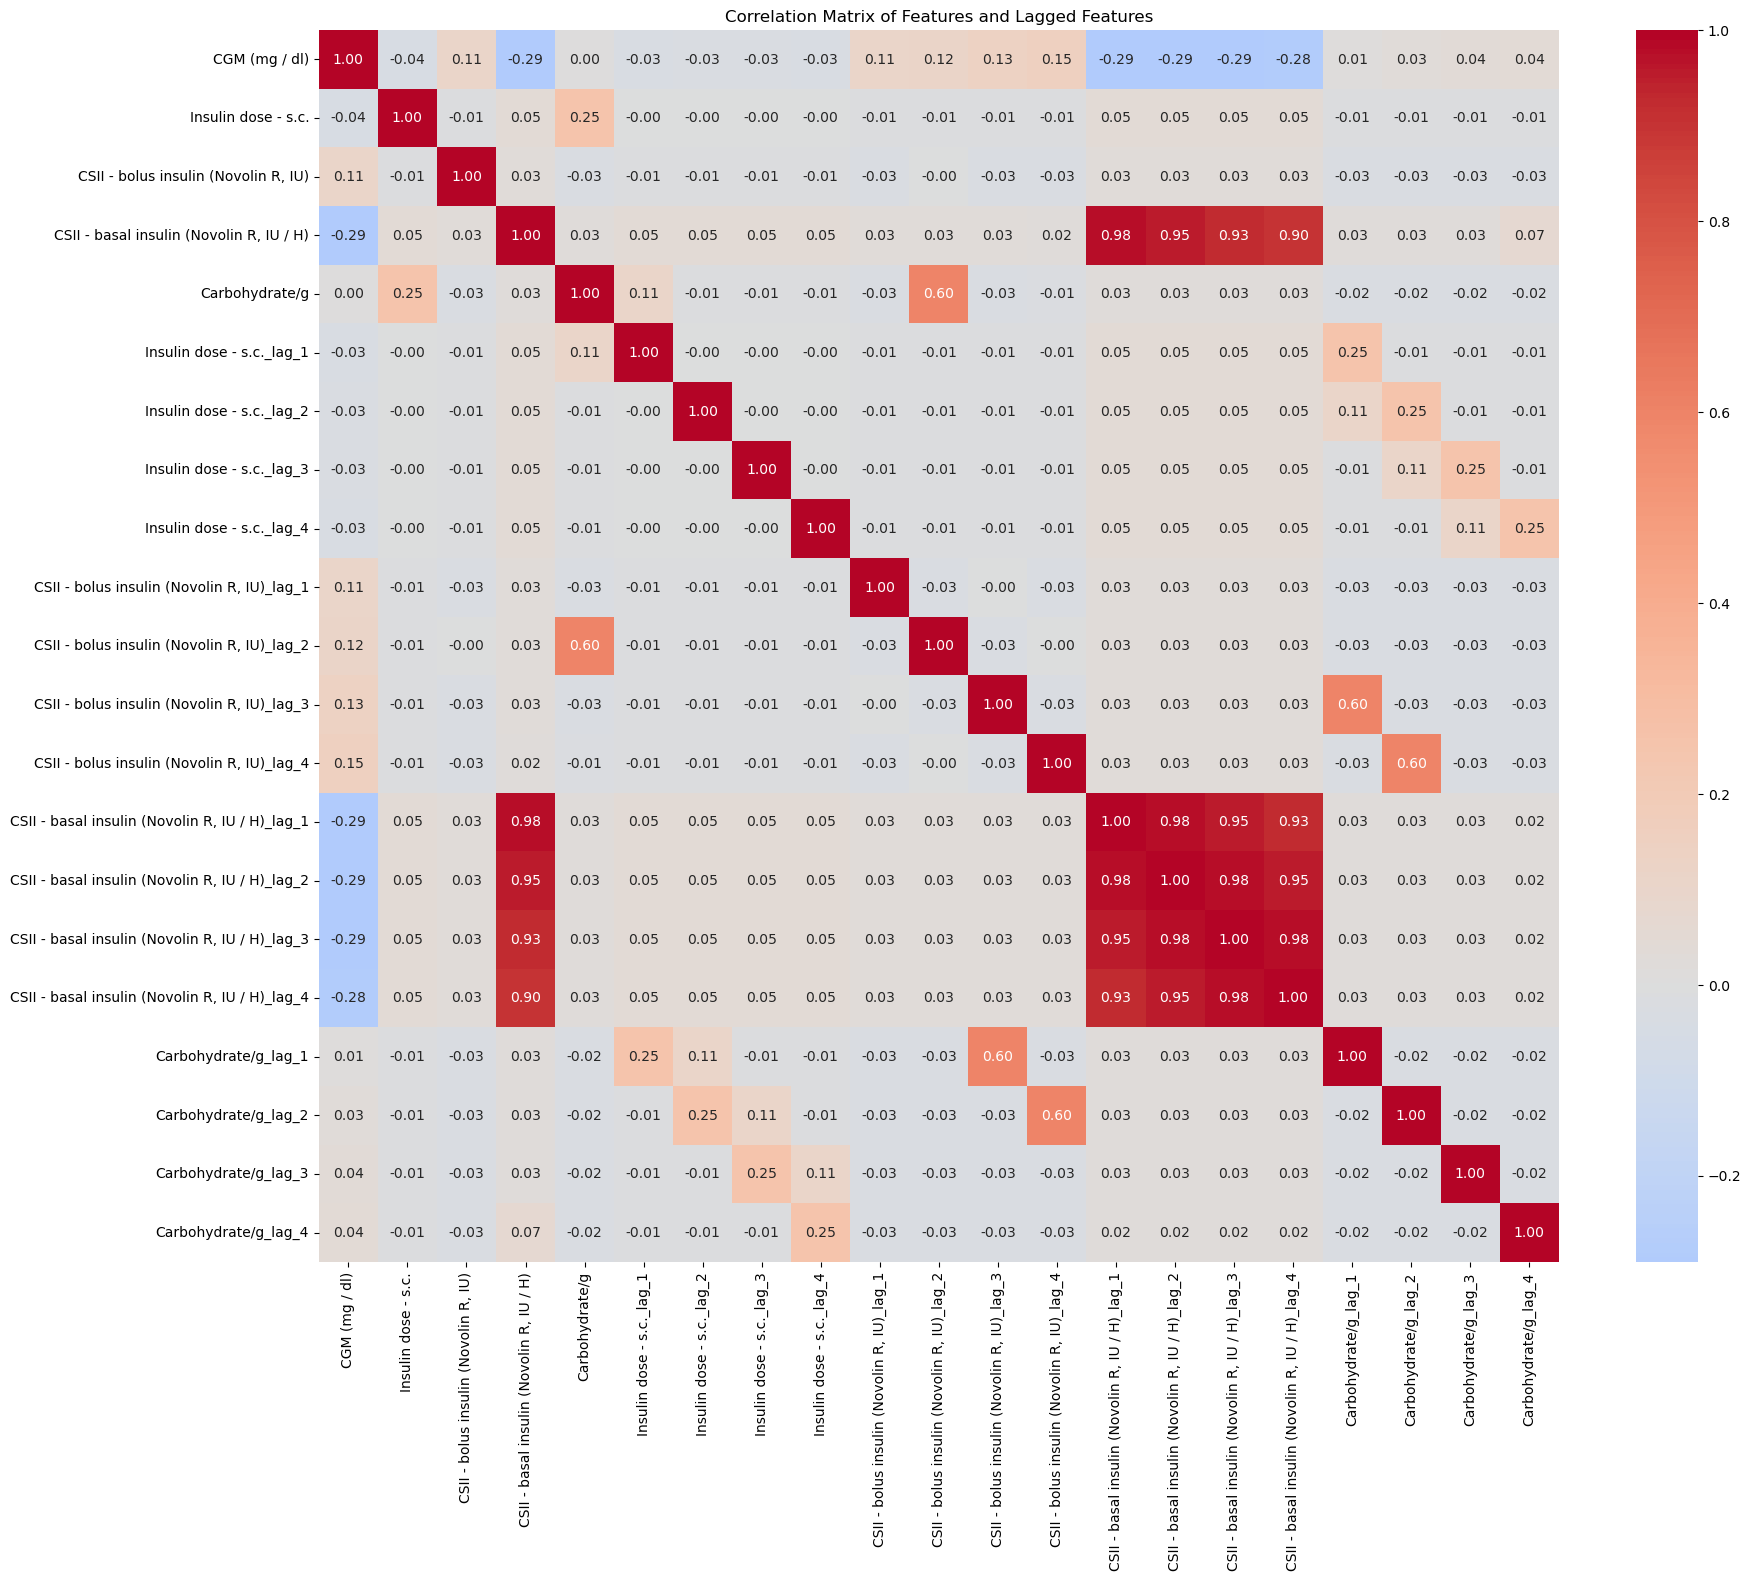

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot1(path):

    data = pd.read_csv(path, parse_dates=["Date"])
    # 选择需要的特征和目标变量
    features = [
        "CGM (mg / dl)",
        "Insulin dose - s.c.",
        "CSII - bolus insulin (Novolin R, IU)",
        "CSII - basal insulin (Novolin R, IU / H)",
        "Carbohydrate/g",
    ]
    target = "CGM (mg / dl)"

    # 处理缺失值（可以根据具体情况选择不同的方法，这里是简单地删除包含缺失值的行）
    data = data.dropna(subset=features)

    # 创建滞后特征
    lagged_features = []
    window_size = 4  # 假设每小时4个点，即每15分钟一个点

    for feature in features:
        if feature != target:  # 排除目标变量本身
            for lag in range(1, 5):  # 创建1到4个时间点的滞后特征
                data[f"{feature}_lag_{lag}"] = data[feature].shift(lag)
                lagged_features.append(f"{feature}_lag_{lag}")

    # 删除包含NaN值的行
    data = data.dropna()

    # 将滞后特征和目标变量分开
    X = data[features + lagged_features]
    y = data[target]

    # 计算皮尔逊相关系数
    correlation_matrix = X.corr()

    # 保存相关性矩阵到CSV文件
    correlation_matrix.to_csv("data/correlation_matrix_with_lagged_features.csv")

    # 绘制热图，0设为颜色最淡的中位数
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title("Correlation Matrix of Features and Lagged Features")
    plt.show()

plot1("data/Shanghai_T2DM/2000_0_20201230.csv")
plot1("data/Shanghai_T2DM/2003_0_20210615.csv")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# 读取数据


def plot2(path):

    data = pd.read_csv(path, parse_dates=["Date"])

    # 选择需要的特征和目标变量
    features = [
        "CGM (mg / dl)",
        "Insulin dose - s.c.",
        "CSII - bolus insulin (Novolin R, IU)",
        "CSII - basal insulin (Novolin R, IU / H)",
        "Carbohydrate/g",
    ]
    target = "CGM (mg / dl)"

    # 处理缺失值（可以根据具体情况选择不同的方法，这里是简单地删除包含缺失值的行）
    data = data.dropna(subset=features)

    # 创建滞后特征
    lagged_features = []
    window_size = 4  # 假设每小时4个点，即每15分钟一个点

    for feature in features:
        if feature != target:  # 排除目标变量本身
            for lag in range(1, 5):  # 创建1到4个时间点的滞后特征
                data[f"{feature}_lag_{lag}"] = data[feature].shift(lag)
                lagged_features.append(f"{feature}_lag_{lag}")

    # 删除包含NaN值的行
    data = data.dropna()

    # 将滞后特征和目标变量分开
    X = data[lagged_features]
    y = data[target]

    # 归一化特征
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # 训练随机森林回归模型
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    # 获取特征重要性
    importances = model.feature_importances_

    # 特征重要性排序
    feature_importances = pd.DataFrame(
        {"Feature": lagged_features, "Importance": importances}
    ).sort_values(by="Importance", ascending=False)

    # 打印特征重要性
    print(feature_importances)

    # 可视化特征重要性
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Importance", y="Feature", data=feature_importances)
    plt.title("Feature Importances from Random Forest with Lagged Features")
    plt.show()

plot2("data/Shanghai_T1DM/2003_0_20210615.csv")
plot2("data/Shanghai_T2DM/2000_0_20201230.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/Shanghai_T1DM/2003_0_20210615.csv'

In [3]:
import os
import pandas as pd

# 文件夹路径
directory_path = "dataset/T1DM"


# 读取并检查每个CSV文件中的所有行之间的时间间隔
def check_time_intervals(directory_path):
    discrepancies = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            try:
                data = pd.read_csv(file_path, parse_dates=["Date"])
                time_diffs = data["Date"].diff().dropna()
                if not all(time_diffs == pd.Timedelta(minutes=15)):
                    discrepancies[filename] = time_diffs[
                        time_diffs != pd.Timedelta(minutes=15)
                    ]
            except Exception as e:
                print(f"Error processing file {filename}: {e}")

    return discrepancies


# 检查时间间隔
discrepancies = check_time_intervals(directory_path)
discrepancies

{'1002_1_20210521.csv': 53   0 days 00:30:00
 Name: Date, dtype: timedelta64[ns]}

In [4]:
import os
import pandas as pd

# 文件夹路径
directory_path = "dataset/T2DM"


# 读取并检查每个CSV文件中的所有行之间的时间间隔
def check_time_intervals(directory_path):
    discrepancies = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            try:
                data = pd.read_csv(file_path, parse_dates=["Date"])
                time_diffs = data["Date"].diff().dropna()
                if not all(time_diffs == pd.Timedelta(minutes=15)):
                    discrepancies[filename] = time_diffs[
                        time_diffs != pd.Timedelta(minutes=15)
                    ]
            except Exception as e:
                print(f"Error processing file {filename}: {e}")

    return discrepancies


# 检查时间间隔
discrepancies = check_time_intervals(directory_path)
discrepancies

{'2023_0_20210812.csv': 11   0 days 01:00:00
 Name: Date, dtype: timedelta64[ns],
 '2029_0_20210526.csv': 741   0 days 00:14:59.985000
 742   0 days 00:14:59.995000
 743   0 days 00:14:59.995000
 744   0 days 00:14:59.995000
 745   0 days 00:14:59.995000
 746   0 days 00:14:59.995000
 747   0 days 00:14:59.995000
 748   0 days 00:14:59.995000
 749   0 days 00:14:59.995000
 750   0 days 00:14:59.995000
 751   0 days 00:14:59.995000
 752   0 days 00:14:59.995000
 753   0 days 00:14:59.995000
 754   0 days 00:17:00.075000
 Name: Date, dtype: timedelta64[ns],
 '2040_0_20210729.csv': 163   0 days 00:30:00
 Name: Date, dtype: timedelta64[ns],
 '2080_0_20210816.csv': 697    0 days 00:30:00
 1277   0 days 00:45:00
 Name: Date, dtype: timedelta64[ns],
 '2084_0_20211013.csv': 491   0 days 00:45:00
 Name: Date, dtype: timedelta64[ns],
 '2095_0_20201116.csv': 747    0 days 00:30:00
 1103   0 days 00:30:00
 1196   0 days 00:30:00
 1197   0 days 00:30:00
 1293   0 days 00:30:00
 Name: Date, dtype: t